# Depression Detection Using Multinomial Naive Bytes

## Importing Data and Libraries

In [51]:
import numpy;
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

In [52]:
data = pd.read_csv("D:\good.csv")

The dataset is divided into two columns: "Text" and "Depressed." Users have contributed textual input in the "Text" column, while the "Depressed" column indicates if an individual has identified their post as depression. A number of 1 denotes a post about depression, while 0 implies a post about other mental health issues such as Anxiety. Additionally there are several repeated rows in the data set. To enhance the effectiveness of the model, data cleansing is necessary, including the removal of duplicate entries that can negatively impact model performance.

## Data Cleaning and Preprocessing

In [53]:
data.isnull().sum()

Text         0
Depressed    0
dtype: int64

In [54]:
data.drop_duplicates(inplace=True)
data = data.dropna()

In [35]:
data = data.sample(frac = 1)

In [36]:
data.head()

,Text,Depressed
378,My of eight years and father of our two chil...,0
660,I try to avoid ideologies self-labels and ma...,1
512,I have a temper I get mad very easily the...,0
270,When I ask him who he is talking to he tells ...,0
341,I have dog obsess disorder and I am having pro...,0


In [55]:
#Saving the dataframe for future use
data.to_csv('data.csv')

## EDA

Exploratory Data Analysis (EDA) is crucial in the fields of machine learning and data analysis. In our current situation, where we are working with text-based data, our goal is to thoroughly examine numerous textual properties, such as character count, word count, and sentence count.
We hope to discover any potential connections or patterns that may exist between these textual elements and the 'Depression' column, which indicates whether or not an individual has been diagnosed with depression. By going into these details, we can get significant insights that will help us better understand how text-based data relates to the presence or absence of depression diagnoses.

In [56]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amita\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [57]:
data.dtypes

Text         object
Depressed     int64
dtype: object

([<matplotlib.patches.Wedge at 0x1dfe31e1e90>,
 [Text(-0.15266326806183736, 1.0893548212518636, ''),
  Text(0.1526633700545957, -1.0893548069584922, '')])

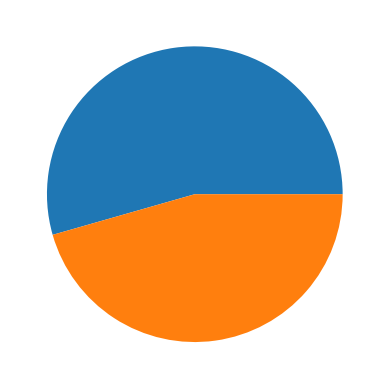

In [58]:
plt.pie(data['Depressed'].value_counts())

The data is almost evenly balanced

In [59]:
data['char'] = data['Text'].apply(len)
data['words'] = data['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [60]:
data[['char','words']].describe()

,char,words
count,801.000000,801.000000
mean,301.578027,59.340824
std,222.780064,43.947980
min,7.000000,1.000000
25%,161.000000,31.000000
50%,251.000000,49.000000
75%,363.000000,71.000000
max,1411.000000,291.000000


In [61]:
data[data['Depressed'] == 0][['char','words']].describe()

,char,words
count,436.000000,436.000000
mean,297.412844,59.451835
std,209.036782,41.983412
min,67.000000,13.000000
25%,166.000000,33.000000
50%,250.500000,49.000000
75%,353.250000,69.000000
max,1407.000000,276.000000


In [62]:
data[data['Depressed'] == 1][['char','words']].describe()

,char,words
count,365.000000,365.000000
mean,306.553425,59.208219
std,238.356565,46.243330
min,7.000000,1.000000
25%,153.000000,28.000000
50%,255.000000,48.000000
75%,388.000000,75.000000
max,1411.000000,291.000000


<Axes: xlabel='char', ylabel='Count'>

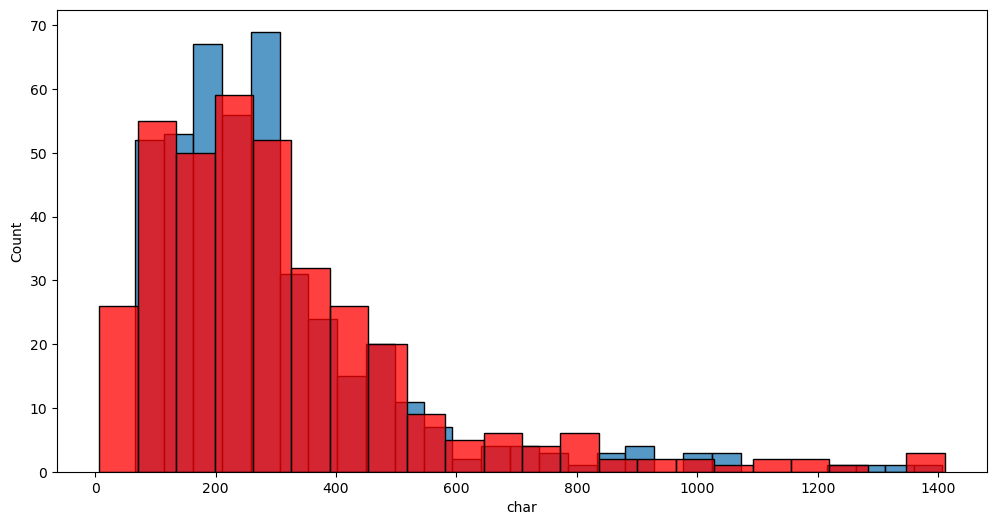

In [63]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['Depressed'] == 0]['char'])
sns.histplot(data[data['Depressed'] == 1]['char'],color='red')

<Axes: xlabel='words', ylabel='Count'>

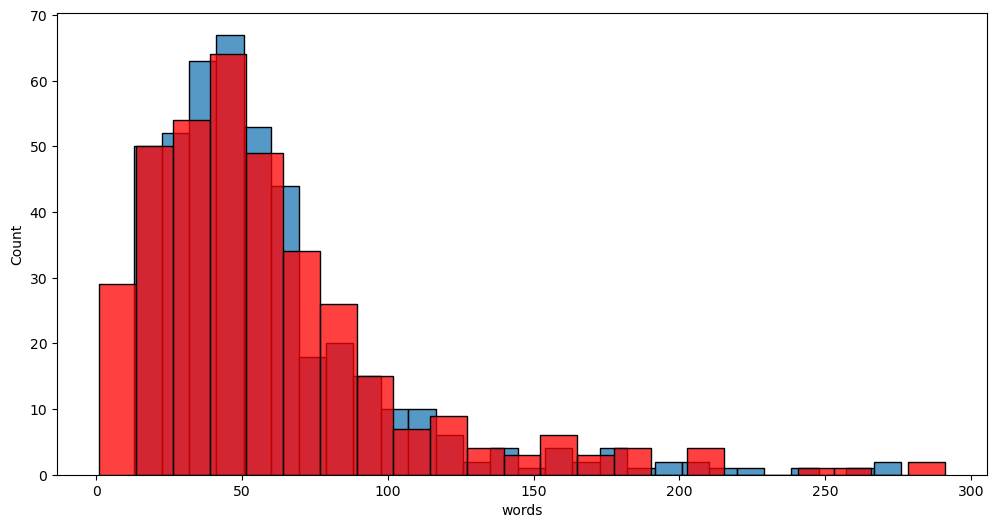

In [64]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['Depressed'] == 0]['words'])
sns.histplot(data[data['Depressed'] == 1]['words'],color='red')

While the dataset does not contain a large number of observations about the relationship between the number of characters or words, and depression diagnoses, it is clear that there are certain outliers that should be investigated. Outliers must be discovered and deleted from the dataset if they depart considerably from regular patterns or trends. 


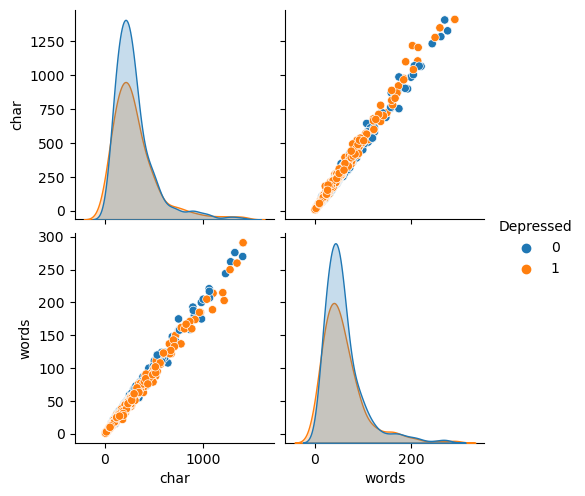

In [65]:
sns.pairplot(data,hue='Depressed')

In [66]:
data = data[data['Text'].str.len() < 1500]

In [67]:
data = data[data['Text'].str.len() > 60]

This code filters the data to keep just the rows where the 'qn1' text is less than 1500 characters long. This method efficiently eliminates data entries that are outliers. By doing so, we ensure that our analysis and subsequent machine learning models focus on a more standardized range of text lengths, resulting in a more robust and reliable study.


In [68]:
words = []
for x in data[data['Depressed'] == 1]['Text'].tolist():
    for word in x.split():
       words.append(word)

In [69]:
from collections import Counter
word_counts = Counter(words)

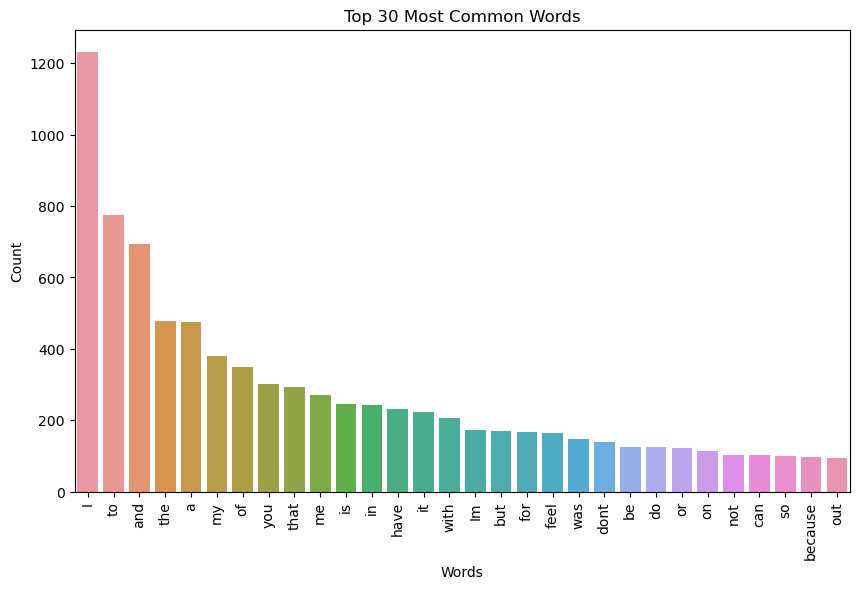

In [70]:
word_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Create a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Count', data=word_df)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 30 Most Common Words')
plt.show()

In [71]:
normal_words = []
for x in data[data['Depressed'] == 0]['Text'].tolist():
    for word in x.split():
       normal_words.append(word)

In [72]:
normal_count = Counter(normal_words)

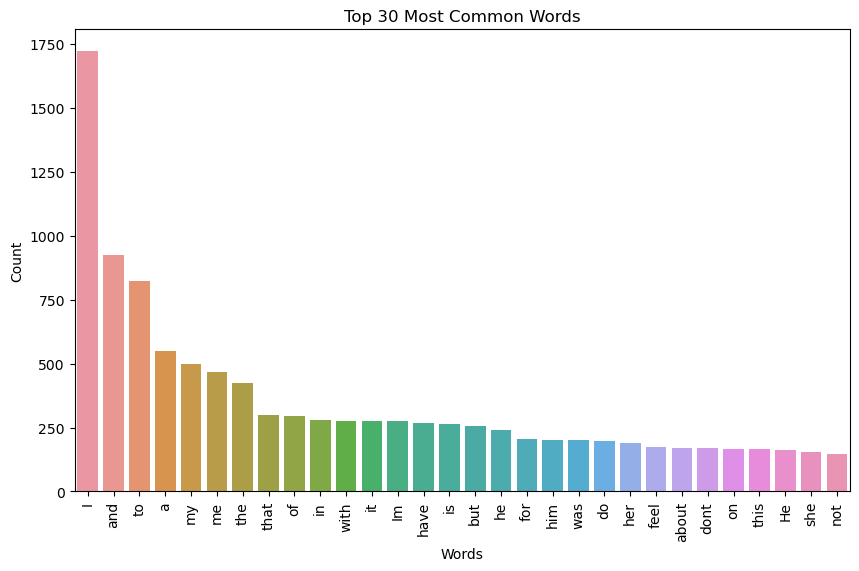

In [73]:
normal_df = pd.DataFrame(normal_count.most_common(30), columns=['Word', 'Count'])

# Create a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Count', data=normal_df)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 30 Most Common Words')
plt.show()

It is clear from looking at the most frequent terms that some words, such "I," "and," "to," "my," and others, are commonly found in both sets of data. However a point to note is that  The terms like "Depressed" and "Anxious" were purposefully filtered out during preprocessing in Microsoft Excel. While adding such phrases might increase model accuracy, it might also result in incorrect diagnoses. The Naive Bayes algorithm, for instance, may mistakenly read claims like "I'm depressed" as indicating a depression diagnosis while such claims may not actually reflect a clinical diagnostic. In order to assure the model's accuracy and the dependability of its predictions, such keywords must be excluded.

# Creating the Model

In [74]:
X = data['Text'].values
y = data['Depressed'].values

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 0)

In [76]:
X_test.shape

(157,)

In [77]:
y_test.shape

(157,)

In [78]:
X_train.shape

(624,)

In [79]:
y_train.shape

(624,)

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [81]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [82]:
x_test = cv.transform(X_test)
y_pred = nb.predict(x_test)
from sklearn.metrics import accuracy_score
print("Testing Accuracy:")
accuracy_score(y_pred, y_test)

Testing Accuracy:


0.7898089171974523

In [83]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
f1_score(y_pred, y_test)

0.7401574803149608

In [84]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[77 13]
 [20 47]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        90
           1       0.78      0.70      0.74        67

    accuracy                           0.79       157
   macro avg       0.79      0.78      0.78       157
weighted avg       0.79      0.79      0.79       157



In [85]:
data.to_csv('edit.csv')

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [87]:
y_pre = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pre)
print("Accuracy:", accuracy)

Accuracy: 0.7770700636942676


In [88]:
f1_score(y_pre, y_test)

0.7154471544715447

In [89]:
print(confusion_matrix(y_test,y_pre))
print(classification_report(y_test,y_pre))

[[78 12]
 [23 44]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        90
           1       0.79      0.66      0.72        67

    accuracy                           0.78       157
   macro avg       0.78      0.76      0.77       157
weighted avg       0.78      0.78      0.77       157



In [90]:
from sklearn.linear_model import LogisticRegression
# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
# Prediction
y_pr = clf.predict(x_test)
 
acc = accuracy_score(y_test, y_pr)
print(acc)

0.7388535031847133


In [91]:
f1_score(y_pr, y_test)

0.6962962962962963

In [92]:
print(confusion_matrix(y_test,y_pr))
print(classification_report(y_test,y_pr))

[[69 21]
 [20 47]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.77        90
           1       0.69      0.70      0.70        67

    accuracy                           0.74       157
   macro avg       0.73      0.73      0.73       157
weighted avg       0.74      0.74      0.74       157



In [93]:
from sklearn.neighbors import KNeighborsClassifier 
for k in range(2, 21): 
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
y_p = clf.predict(x_test)
accuracy_score(y_test, y_p)

0.7388535031847133

In [94]:
f1_score(y_p, y_test)

0.6962962962962963

In [95]:
import xgboost

xgboost = xgboost.XGBClassifier()
xgboost.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [96]:
y_pred = xgboost.predict(x_test)
pred = [round(value) for value in y_pred]
accuracy_score(y_test, pred)

0.7388535031847133

In [97]:
f1_score(pred, y_test)

0.6917293233082707

In [98]:
from sklearn.svm import SVC
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
svm.fit(X_train, y_train)

SVC(gamma=0.5)

In [99]:
y_pred = svm.predict(x_test)
accuracy_score(y_test, y_pred)

0.6050955414012739

In [100]:
f1_score(y_pred, y_test)

0.225

In [101]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

In [102]:
poly.fit(X_train, y_train)

PolynomialFeatures(include_bias=False)

In [103]:
y_pred = svm.predict(x_test)
accuracy_score(y_test, y_pred)

0.6050955414012739

In [104]:
f1_score(y_pred, y_test)

0.225

In [105]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(x_test)

In [106]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[339   7]
 [  4 274]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       346
           1       0.98      0.99      0.98       278

    accuracy                           0.98       624
   macro avg       0.98      0.98      0.98       624
weighted avg       0.98      0.98      0.98       624



In [107]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[71 19]
 [24 43]]
              precision    recall  f1-score   support

           0       0.75      0.79      0.77        90
           1       0.69      0.64      0.67        67

    accuracy                           0.73       157
   macro avg       0.72      0.72      0.72       157
weighted avg       0.72      0.73      0.72       157



In [108]:
accuracy_score(y_test,predict_test)

0.7261146496815286

In [109]:
f1_score(y_test,predict_test)

0.6666666666666666

In [110]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)
data['Text'] = data['Text'].apply(lemmatize_words)

In [112]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [113]:
x_test = cv.transform(X_test)
y_pred = nb.predict(x_test)
from sklearn.metrics import accuracy_score
print("Testing Accuracy:")
accuracy_score(y_pred, y_test)

Testing Accuracy:


0.7898089171974523

In [114]:
from sklearn.metrics import f1_score
f1_score(y_pred, y_test)

0.7401574803149608

In [115]:
import xgboost

xgboost = xgboost.XGBClassifier()
xgboost.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [116]:
y_pred = xgboost.predict(x_test)
pred = [round(value) for value in y_pred]
accuracy_score(y_test, pred)

0.7388535031847133

In [117]:
f1_score(pred, y_test)

0.6917293233082707

In [118]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(x_test)

C:\Users\amita\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [119]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[343   3]
 [  8 270]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       346
           1       0.99      0.97      0.98       278

    accuracy                           0.98       624
   macro avg       0.98      0.98      0.98       624
weighted avg       0.98      0.98      0.98       624



In [120]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[60 30]
 [15 52]]
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        90
           1       0.63      0.78      0.70        67

    accuracy                           0.71       157
   macro avg       0.72      0.72      0.71       157
weighted avg       0.73      0.71      0.71       157



In [121]:
accuracy_score(y_test,predict_test)

0.7133757961783439

In [122]:
f1_score(y_test,predict_test)

0.6979865771812079

In [123]:
from sklearn.neighbors import KNeighborsClassifier 
for k in range(2, 21): 
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
y_p = clf.predict(x_test)
accuracy_score(y_test, y_p)

0.7388535031847133

In [124]:
f1_score(y_p, y_test)

0.6962962962962963

# Text Prediction

In [127]:
texts = ["I've been feeling overwhelmed lately and don't find joy in things I used to enjoy."]

main_text = cv.transform(texts)

# Predict whether the input text suggests depression or not
check = nb.predict(main_text)[0]

if check == 0:
    print("The model predicts that you may not be experiencing depression.")
else:
    print("The model predicts that you may be experiencing symptoms of depression.")

The model predicts that you may be experiencing symptoms of depression.


In [126]:
# depressed, anxious, sad, really, just, like, feels,bad